# Manufacturing Data Science 製造數據科學 Assignment 3
- 學號：R08725059
- 姓名：張煜柔

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

---
# 1. (25%)Nov. 12 資料科學應用案例演講
## (a) (5%) 該演講對您來說印象深刻的主題為何?為什麼?請摘要此深刻的主題。其對您來 說帶來的啟發為何?

印象比較深刻的是友達的數位轉型歷程，過去並不是很了解供應鏈的歷史，對於工廠的認識主要還是在傳統工廠，這次聽完演講以後對於智能工廠有更多概念。而從友達的數位轉型歷程：製造2.0 -> 智慧管理 -> 數位轉型可以了解到友達是不斷日新月異、精益求精，讓我對這個產業有更近一步的認識。

## (b) (5%) 該演講是否有翻轉/顛覆您對過去製造業的認知?如果有，什麼認知有了改變?如 果無，什麼樣的認知跟您過去的既定印象一樣，是否有任何建議或可改善之處?

如同前一題所述，對過去製造業的認識仍停留在傳統工廠，這次友達的演講特別切入他們目前在做的數位轉型的部分，從資料開學的應用（如何準確取樣、收取資料的頻率、細緻運作）、設備保養方式的演進（發展行動健檢 Dr.Pi）、工廠製程資訊結構的改善、到精準製程控制（環境面監控）等，可以發現目前所學的許多數據科學的方法，友達都有成熟應用。相信這些都是與傳統製造業不同的地方，也是像友達這類精密製造業需不斷跟進、持續發展。

## (c) (5%) 該演講讓您瞭解到製造業應用數據科學方法的困難與挑戰在於何處?為什麼? 如何建議或解決?

印象最深刻的困難/挑戰是 imblanced data 的問題。一般發展良好的製造商，特別是這類生產精密晶圓、產品的製造業，通常良率都不會太差。但將這些資料實際用資料分析的分法去進行分析時，就會遇到資料不平衡、很難訓練模型的問題。

建議的解決通常是採用 oversampling 或 undersampling 的方法。但是如果量率極高的狀況下，undersampling 會造成資料筆數太少，因此不太適合。建議的解決方法是嘗試合適的 oversampling 方法，來對訓練資料進行 oversample，再將 oversample 的資料拿來訓練模型後放進測試資料裡面檢視模型成效。

## (d) (5%) 演講內容中，是否有任何疑點?或想問講者的問題為何?

較有疑問的地方是，最後講者提及「隨著時間的挑戰友達光電也漸漸衰退」，但可以看到在面對生產製程面向，友達感覺已經走在業界的前端，但講者認為主要衰退的成因為何？講者有提及公司持續發展的動力，最重要的關鍵是「人」，他們期待找有想法、有能力展現的人，但從演講中也可以看到友達不缺乏這樣的人才，因此對於講者提及的漸漸衰退感到疑問。

## (e) (5%) 在演講內容中，是否有任何想給予建議的地方?例如問題切入點、問題本質、方法調整、驗證的省思等。

主要如同上一小題的疑點做延伸，從中感覺到所謂的衰退可能有其他原因，建議友達可以從其他面向進行切入，是產業的整體走向嗎？或是其他可能原因，雖然要找到主要的成因可能很困難，但感覺是非常重要的事情。

---
# 2. (40%) Decision Tree Algorithms

### Load data

In [ ]:
col_list = pd.read_excel('MDS_Assignment3_Steelplates.xlsx', sheet_name='Var_Name', header=None)[0].tolist()
y_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
steelplates_df = pd.read_excel('MDS_Assignment3_Steelplates.xlsx', sheet_name='Faults', names=col_list)
steelplates_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
1,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
2,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
3,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
4,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1936,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1937,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1938,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


## (a) (5%) Construct a data science framework and show the data summary

### 檢查欄位的資料型態

In [ ]:
steelplates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1940 non-null   int64  
 1   X_Maximum              1940 non-null   int64  
 2   Y_Minimum              1940 non-null   int64  
 3   Y_Maximum              1940 non-null   int64  
 4   Pixels_Areas           1940 non-null   int64  
 5   X_Perimeter            1940 non-null   int64  
 6   Y_Perimeter            1940 non-null   int64  
 7   Sum_of_Luminosity      1940 non-null   int64  
 8   Minimum_of_Luminosity  1940 non-null   int64  
 9   Maximum_of_Luminosity  1940 non-null   int64  
 10  Length_of_Conveyer     1940 non-null   int64  
 11  TypeOfSteel_A300       1940 non-null   int64  
 12  TypeOfSteel_A400       1940 non-null   int64  
 13  Steel_Plate_Thickness  1940 non-null   int64  
 14  Edges_Index            1940 non-null   float64
 15  Empt

### Numeric variables summary

In [ ]:
steelplates_df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1940.000000,1940.000000,1.940000e+03,1.940000e+03,1940.000000,1940.000000,1940.000000,1.940000e+03,1940.000000,1940.000000,...,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
mean,571.408763,618.257216,1.651396e+06,1.651450e+06,1894.717010,111.904124,82.986082,2.064060e+05,84.553093,130.205155,...,0.082909,-0.131223,0.585422,0.080928,0.097938,0.201546,0.037113,0.028351,0.207216,0.346907
std,520.686209,497.588484,1.774759e+06,1.774771e+06,5169.660065,301.279144,426.591922,5.124090e+05,32.141974,18.689013,...,0.500719,0.148761,0.339539,0.272795,0.297308,0.401259,0.189088,0.166015,0.405417,0.476109
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.750000,192.000000,4.717795e+05,4.718240e+05,84.000000,15.000000,13.000000,9.519500e+03,63.000000,124.000000,...,-0.333300,-0.194850,0.247875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.500000,468.500000,1.205078e+06,1.205088e+06,173.500000,26.000000,25.000000,1.919550e+04,90.000000,127.000000,...,0.094900,-0.132900,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.250000,2.183491e+06,2.183501e+06,822.500000,84.000000,83.000000,8.316500e+04,106.000000,140.000000,...,0.502900,-0.066575,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 視覺化各變數檢視分布狀況

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98d9ab65c0>,
      dtype=object)

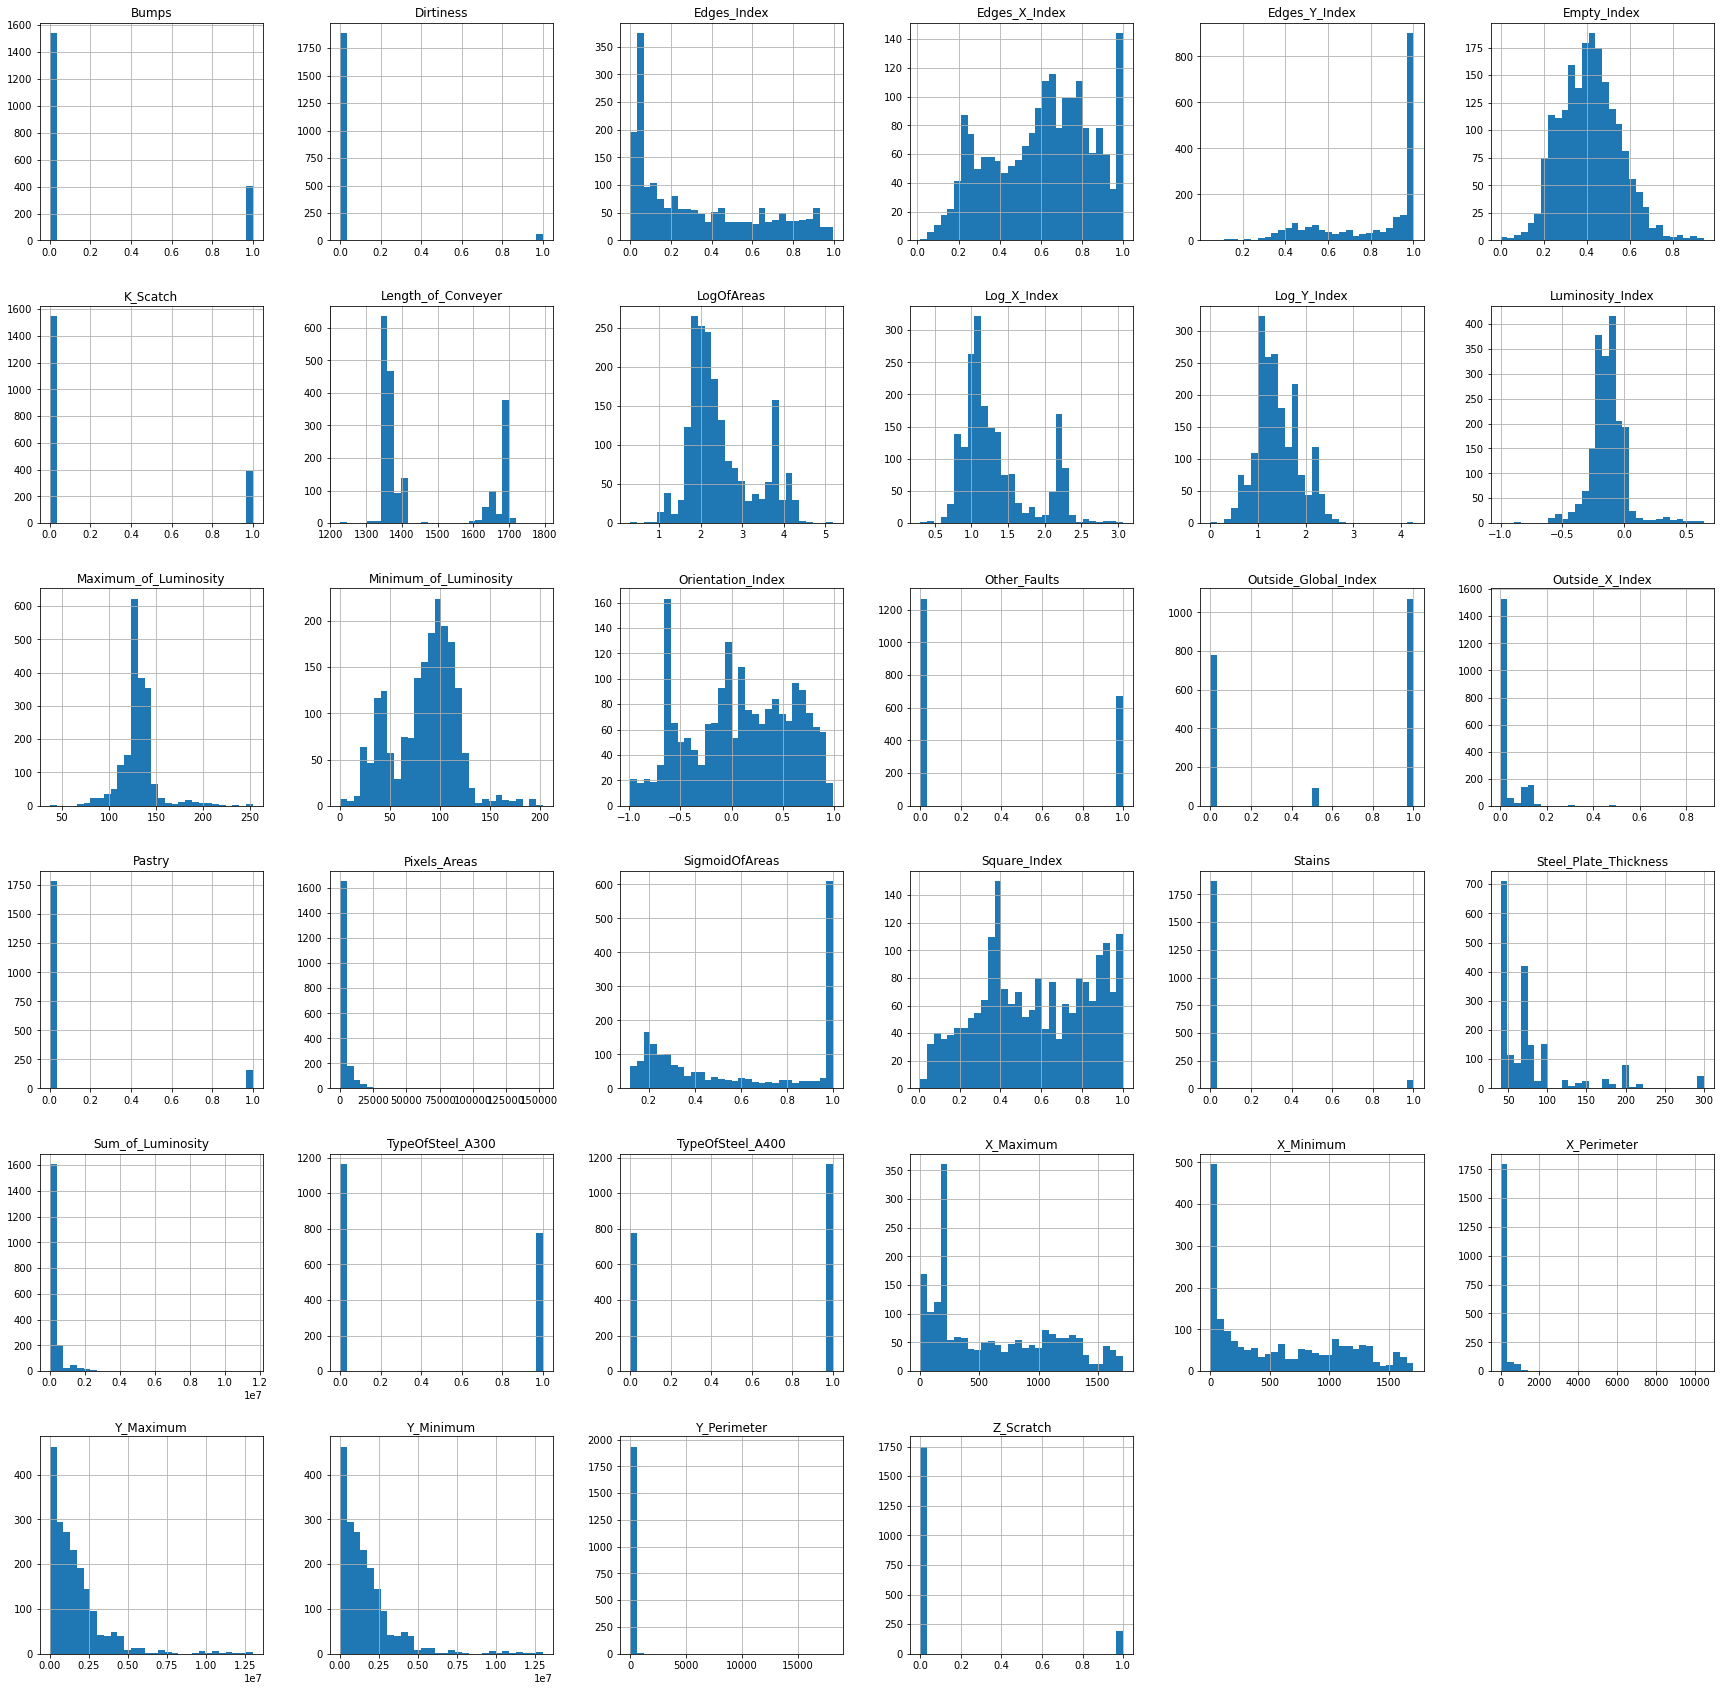

In [ ]:
steelplates_df.hist(bins=30, figsize=(30, 30))

## (b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?

### Any identical column?

In [ ]:
for colA in col_list:
    for colB in col_list:
        if colA == colB:
            continue
        elif steelplates_df[colA].equals(steelplates_df[colB]):
            print(colA, 'and', colB, 'is identical')

沒有完全一樣的欄位

### Any redundant column?
檢視欄位間的相關係數，看是否有彼此之間高度相關的變數

In [ ]:
corr = steelplates_df.corr()
corr.style.background_gradient(cmap='coolwarm')

抓出相關係數大於 0.9 的自變數 pair

In [ ]:
high_corr_pair = (corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                            .stack()
                            .sort_values(ascending=False))
high_corr_pair[high_corr_pair >= 0.9]

TypeOfSteel_A300  TypeOfSteel_A400     1.000000
Y_Minimum         Y_Maximum            1.000000
X_Minimum         X_Maximum            0.988311
Pixels_Areas      Sum_of_Luminosity    0.978951
                  X_Perimeter          0.966642
X_Perimeter       Sum_of_Luminosity    0.912951
                  Y_Perimeter          0.912447
dtype: float64

根據上述高度相關變數組合，選擇 drop 掉 Y_Maximum, X_Maximum, Pixels_Areas, X_Perimeter 變數。

In [ ]:
high_corr_drop_cols = ['Y_Maximum', 'X_Maximum', 'Pixels_Areas', 'X_Perimeter']

此外，根據題目的敘述：「The last seven columns (i.e. dependent variables) are one hot encoded classes, i.e. if the plate fault is classified as "Stains" there will be a 1 in that column and 0's in the other columns.」由於 one-hot encoding 的關係，任一應變數欄位的值可以由其他應變數欄位的值獲得，因此會有一個應變數欄位是 redundent 的。
由於我們接下來是要建立一個 multi-classes 的分類器，因此將各個 one-hot encoding 應變數欄位整理病新增 Targets 欄位。

In [ ]:
targets = steelplates_df[y_cols]
steelplates_df['targets'] = targets.idxmax(1)
steelplates_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,targets
0,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
1,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
2,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
3,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry
4,430,441,100250,100337,630,20,87,62357,64,127,...,-0.2267,0.9874,1,0,0,0,0,0,0,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1936,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1937,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1938,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults


### Any missing value?
檢查各個資料欄位是否含有空值

In [ ]:
steelplates_df.isna().any()

X_Minimum                False
X_Maximum                False
Y_Minimum                False
Y_Maximum                False
Pixels_Areas             False
X_Perimeter              False
Y_Perimeter              False
Sum_of_Luminosity        False
Minimum_of_Luminosity    False
Maximum_of_Luminosity    False
Length_of_Conveyer       False
TypeOfSteel_A300         False
TypeOfSteel_A400         False
Steel_Plate_Thickness    False
Edges_Index              False
Empty_Index              False
Square_Index             False
Outside_X_Index          False
Edges_X_Index            False
Edges_Y_Index            False
Outside_Global_Index     False
LogOfAreas               False
Log_X_Index              False
Log_Y_Index              False
Orientation_Index        False
Luminosity_Index         False
SigmoidOfAreas           False
Pastry                   False
Z_Scratch                False
K_Scatch                 False
Stains                   False
Dirtiness                False
Bumps   

沒有 missing value，因此沒有 drop 掉空值

### Check if the dependent variable is imbalanced

In [ ]:
steelplates_df[y_cols].sum(axis=0)

Pastry          157
Z_Scratch       190
K_Scatch        391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64

可以觀察到其實應變數蠻 imbalanced 的

### Set independent variables and dependent variables

In [ ]:
drop_from_X_cols = high_corr_drop_cols + y_cols + ['targets']
X = steelplates_df.drop(columns=drop_from_X_cols)
y = steelplates_df['targets']

### “Randomly” split the dataset into training dataset and testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## (c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Hyperparameter tuning: tree depth (1~15) and 10-fold cross validation
因為應變數 imblanced，所以使用 f1_weighted 與 roc_auc_ovr_weighted 分別作為 F1 score 與 ROC curve 的 metrics。

In [ ]:
depth = np.arange(1, 16)
metrics_list = ['accuracy', 'f1_weighted', 'roc_auc_ovr_weighted']
score_dict = {}

for metric in metrics_list:
    score_list = []
    for i in depth:
        clf = DecisionTreeClassifier(criterion = "gini", max_depth = i)
        score = cross_val_score(clf, X_train, y_train, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

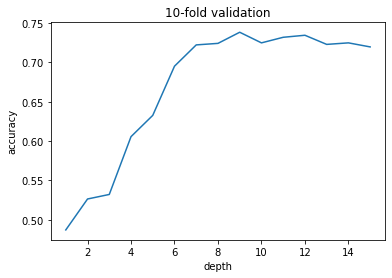

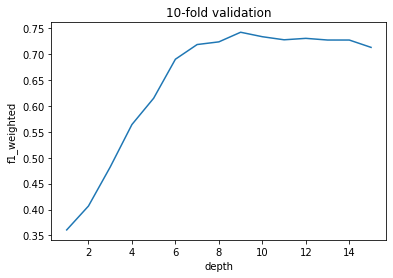

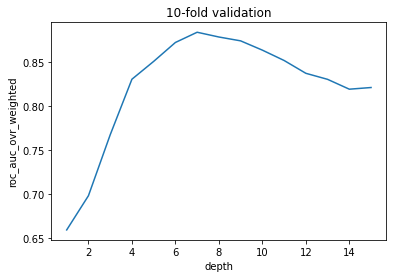

In [ ]:
for metric in metrics_list:
    plt.plot(depth, score_dict[metric])
    plt.xlabel("depth")
    plt.ylabel(metric)
    plt.title("10-fold validation")
    plt.show()

從 f1 weighted 以及 accuracy 中可以發現，當 tree depth 在 10 層以後就開始 overfitting，因此樹深這個 hyperparmeter 選擇 9 層，重新用所有的訓練資料訓練模型，並檢視在測試資料裡的 scoring 如何。

In [ ]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1 weighted:', metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred_proba = clf.predict_proba(X_test)
print('ROC weighted:', metrics.roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovo'))

Accuracy: 0.6932989690721649
f1 weighted: 0.6915183719664604
ROC weighted: 0.8855007949890029


## (d) (5%) Suggest a method to address the data imbalance issue. Build a new balanced dataset.

### SMOTE oversampling
參考[此篇文章](https://machinelearningmastery.com/multi-class-imbalanced-classification/)關於 multi-class 的 oversampling 作法，使用文章中第二個作法，對訓練資料進行 SMOTE oversampling。（測試資料並不做 oversampling）

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[('Bumps', 528), ('Dirtiness', 528), ('K_Scatch', 528), ('Other_Faults', 528), ('Pastry', 528), ('Stains', 528), ('Z_Scratch', 528)]


## (e) (5%) Based on the balanced dataset, use the classification and regression tree (CART) to analyze the balanced dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

In [ ]:
score_dict = {}

for metric in metrics_list:
    score_list = []
    for i in depth:
        clf = DecisionTreeClassifier(criterion = "gini", max_depth = i)
        score = cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

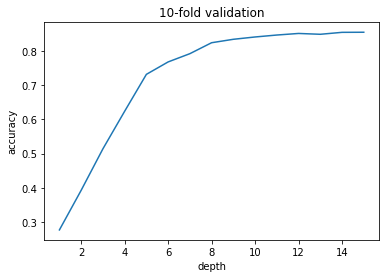

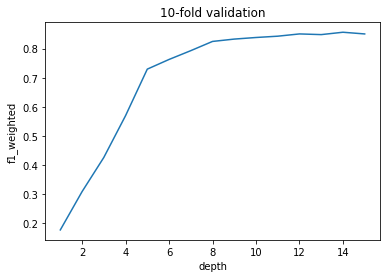

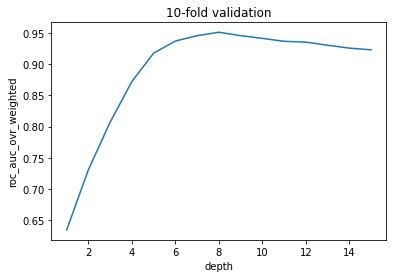

In [ ]:
for metric in metrics_list:
    plt.plot(depth, score_dict[metric])
    plt.xlabel("depth")
    plt.ylabel(metric)
    plt.title("10-fold validation")
    plt.show()

從 ROC curve 中可以發現，當 tree depth 在 9 層以後就開始 overfitting，因此樹深這個 hyperparmeter 選擇 8 層，重新用所有的 oversample 過的訓練資料訓練模型，並檢視在測試資料裡的 scoring 如何。

In [ ]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 8)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1 weighted:', metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred_proba = clf.predict_proba(X_test)
print('ROC weighted:', metrics.roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovo'))

Accuracy: 0.6675257731958762
f1 weighted: 0.666792243755362
ROC weighted: 0.8861334124613803


## (f) (5%) Give a comparison between (c) and (e). Any suggestion or insight?

在做完 oversampling 後，ROC 有些為提升，但 Accuracy 與 f1 score 有稍微下降，可能是因為 oversampling 的方法沒有很符合 testing data 的資料型態。但因為通常不會對 testing data 做 ovversampling，這樣驗證會有失公平。所以這的確可能是做 oversampling 可能遇到的問題。

## (g) (5%) Use “Random Forest” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Train Random Forest by prepared dataset

In [ ]:
score_dict = {}

for metric in metrics_list:
    score_list = []
    for i in depth:
        clf = RandomForestClassifier(criterion = "gini", max_depth = i, random_state=0)
        score = cross_val_score(clf, X_train, y_train, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

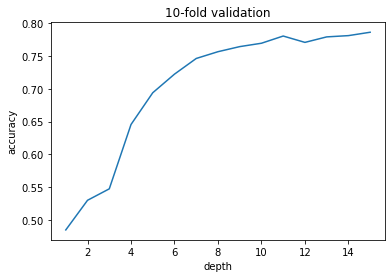

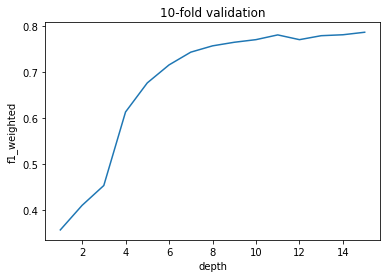

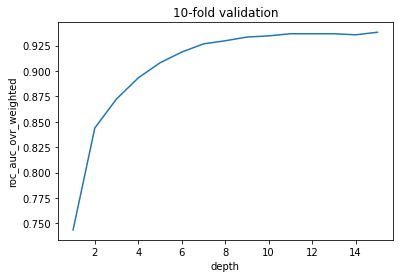

In [ ]:
for metric in metrics_list:
    plt.plot(depth, score_dict[metric])
    plt.xlabel("depth")
    plt.ylabel(metric)
    plt.title("10-fold validation")
    plt.show()

從 f1 weighted 以及 accuracy 中可以發現，當 max tree depth 在 11 層表現最好，因此樹深這個 hyperparmeter 選擇 11 層，重新用所有的訓練資料訓練模型，並檢視在測試資料裡的 scoring 如何。

In [ ]:
clf = RandomForestClassifier(criterion = "gini", max_depth = 11, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1 weighted:', metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred_proba = clf.predict_proba(X_test)
print('ROC weighted:', metrics.roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovo'))

Accuracy: 0.7628865979381443
f1 weighted: 0.7631548235338006
ROC weighted: 0.9480060823520278


### Train Random Forest by balanced dataset

In [ ]:
score_dict = {}

for metric in metrics_list:
    score_list = []
    for i in depth:
        clf = RandomForestClassifier(criterion = "gini", max_depth = i, random_state=0)
        score = cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

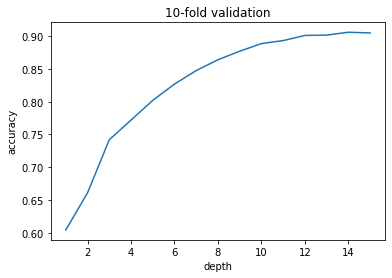

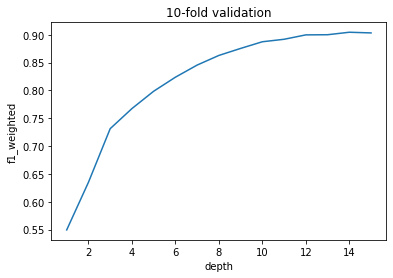

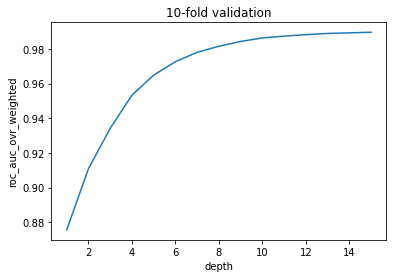

In [ ]:
for metric in metrics_list:
    plt.plot(depth, score_dict[metric])
    plt.xlabel("depth")
    plt.ylabel(metric)
    plt.title("10-fold validation")
    plt.show()

從 Accuracy、F1 weighted、ROC curve 中可以發現，當 max tree depth 在 12 層以後進步幅度就不大，因此樹深這個 hyperparmeter 選擇 12 層，重新用所有的 oversample 過的訓練資料訓練模型，並檢視在測試資料裡的 scoring 如何。

In [ ]:
clf = RandomForestClassifier(criterion = "gini", max_depth = 12, random_state=0)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1 weighted:', metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred_proba = clf.predict_proba(X_test)
print('ROC weighted:', metrics.roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovo'))

Accuracy: 0.770618556701031
f1 weighted: 0.7727266653229694
ROC weighted: 0.9568455508424623


其中可以看到，無論是使用 prepared dataset 或是 balanced dataset 訓練模型，使用 random forest 的模型成效都比單純使用 CART tree 來得好，可見 bagging 對分類有幫助。

## (h) (5%) Use “Gradient Boosting Decision Tree (GBDT)” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

### Train GBDT by prepared dataset
### Hyper parameter tuning: The number of boosting stages

In [ ]:
# gridsearch = np.round(np.logspace(1,3.2,10),0)
gridsearch = np.round(np.logspace(1,2.0,10),0)
gridsearch

array([ 10.,  13.,  17.,  22.,  28.,  36.,  46.,  60.,  77., 100.])

In [ ]:
score_dict = {}

for metric in metrics_list:
    score_list = []
    for c in gridsearch:
        clf = GradientBoostingClassifier(n_estimators=int(c), random_state=0)
        score = cross_val_score(clf, X_train, y_train, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

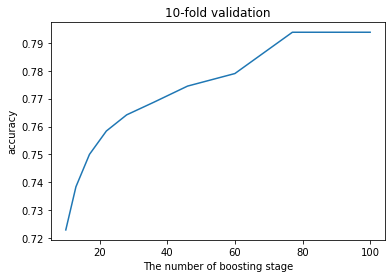

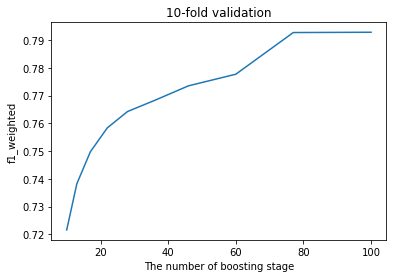

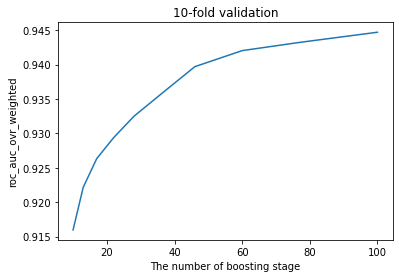

In [ ]:
for metric in metrics_list:
    plt.plot(gridsearch, score_dict[metric])
    plt.xlabel("The number of boosting stage")
    plt.ylabel(metric)
    plt.title("10-fold validation")
    plt.show()

從 f1 weighted 以及 accuracy 中可以發現，當 boosting stage 數量為 77 表現最好，因此這個 hyperparmeter 選擇 77，重新用所有的訓練資料訓練模型，並檢視在測試資料裡的 scoring 如何。

In [ ]:
clf = GradientBoostingClassifier(n_estimators=int(77), random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1 weighted:', metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred_proba = clf.predict_proba(X_test)
print('ROC weighted:', metrics.roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovo'))

Accuracy: 0.7809278350515464
f1 weighted: 0.7802211172204443
ROC weighted: 0.9561992028999087


### Train GBDT by balanced dataset

In [ ]:
score_dict = {}

for metric in metrics_list:
    score_list = []
    for c in gridsearch:
        clf = GradientBoostingClassifier(n_estimators=int(c), random_state=0)
        score = cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring=metric)
        score_list.append(sum(score) / len(score))
    score_dict[metric] = score_list

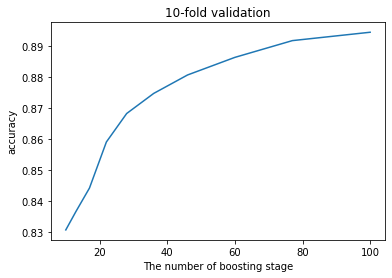

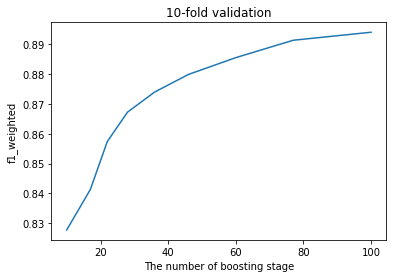

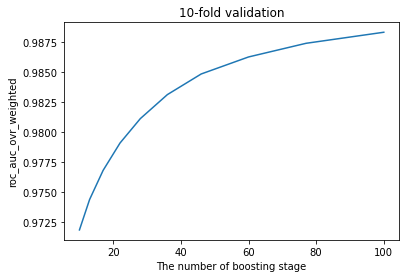

In [ ]:
for metric in metrics_list:
    plt.plot(gridsearch, score_dict[metric])
    plt.xlabel("The number of boosting stage")
    plt.ylabel(metric)
    plt.title("10-fold validation")
    plt.show()

從 Accuracy、F1 weighted、ROC curve 中可以發現，當 boosting stage 數量為 100 表現最好，因此這個 hyperparmeter 選擇 100，重新用所有的 oversample 過的訓練資料訓練模型，並檢視在測試資料裡的 scoring 如何。

In [ ]:
clf = GradientBoostingClassifier(n_estimators=int(100), random_state=0)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1 weighted:', metrics.f1_score(y_test, y_pred, average='weighted'))

y_pred_proba = clf.predict_proba(X_test)
print('ROC weighted:', metrics.roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovo'))

Accuracy: 0.7551546391752577
f1 weighted: 0.7546742657800678
ROC weighted: 0.9576782480322238


與 random forest 進行比較，可發現使用 prepared dataset 訓練的模型其模型成效比 random forest 來得稍好，而比單純用 CART decision tree 而言更好，boosting 有效降低模型的 bias。

---
# 3. (20%) Deep Learning

## (a) (20%) For CNN, try to investigate the effects of changing “PARAMETERS” such as learning rates, momentum, # of hidden/convolutional layers, dropout rate, etc. Show the numerical results and “DIAGRAM” from different perspectives (e.g., accuracy, F1-score, convergence time, error of training data, error of testing data, etc.). Please show all your work in detail, in particular, you “MAY” need to design your experiments with different parameters systematically.

參考[「Tuning the Hyperparameters and Layers of Neural Network Deep Learning」](https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/) 這邊文章建議的 tuning 順序，先分別 tune 各個 hyperparameters 後，再 tune hidden layers 的數量。

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
EPOCH = 15
BATCH_SIZE_ = 16
COLOR_SPECTRUM_ = (1)
cnn_score_dict = {}

### Image transformation

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255,
               horizontal_flip=True,
               zoom_range=0.2,
               shear_range=0.2   )
train_data = train_gen.flow_from_directory('casting_data/train',
                                          class_mode='binary',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory('casting_data/test',
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


建立 basic CNN 模型，用來 tune learning rate 等 hyperparameters。

In [ ]:
def basic_cnn():
    model = tf.keras.models.Sequential()
    # Adding the layers
    input_shape_ = (64,64) + (COLOR_SPECTRUM_, )
    model.add(tf.keras.layers.Conv2D(BATCH_SIZE_, (3,3), input_shape=input_shape_, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Add a second layer
    model.add(tf.keras.layers.Conv2D(BATCH_SIZE_, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Flattening
    model.add(tf.keras.layers.Flatten())
    
    # Add a hidden layer
    model.add(tf.keras.layers.Dense(units = 128, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=.2))

    model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
    
    return model

In [ ]:
# summarize history for accuracy
def plot_history_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# summarize history for loss
def plot_history_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Learning rate tuning

learning rate: 0.005
Epoch 1/15
830/830 [==============================] - 117s 140ms/step - loss: 0.6703 - accuracy: 0.5954 - precision_21: 0.5802 - recall_20: 0.2403 - val_loss: 0.6127 - val_accuracy: 0.6741 - val_precision_21: 0.6706 - val_recall_20: 0.2176
Epoch 2/15
830/830 [==============================] - 112s 135ms/step - loss: 0.6104 - accuracy: 0.6768 - precision_21: 0.6474 - recall_20: 0.5583 - val_loss: 0.5242 - val_accuracy: 0.7469 - val_precision_21: 0.7872 - val_recall_20: 0.4237
Epoch 3/15
830/830 [==============================] - 113s 136ms/step - loss: 0.5436 - accuracy: 0.7214 - precision_21: 0.6925 - recall_20: 0.6424 - val_loss: 0.4493 - val_accuracy: 0.7608 - val_precision_21: 0.7156 - val_recall_20: 0.5763
Epoch 4/15
830/830 [==============================] - 119s 143ms/step - loss: 0.5004 - accuracy: 0.7508 - precision_21: 0.7248 - recall_20: 0.6852 - val_loss: 0.4048 - val_accuracy: 0.8154 - val_precision_21: 0.7778 - val_recall_20: 0.6947
Epoch 5/15
830/830 

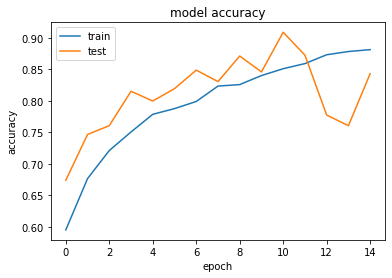

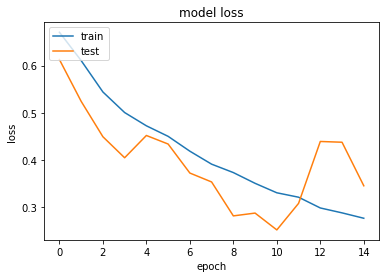

90/90 [==============================] - 2s 22ms/step - loss: 0.3455 - accuracy: 0.8434 - precision_21: 0.7049 - recall_20: 0.9847
learning rate: 0.01
Epoch 1/15
830/830 [==============================] - 129s 155ms/step - loss: 0.6715 - accuracy: 0.5833 - precision_22: 0.5567 - recall_21: 0.1896 - val_loss: 0.6088 - val_accuracy: 0.7021 - val_precision_22: 0.6161 - val_recall_21: 0.4962
Epoch 2/15
830/830 [==============================] - 141s 169ms/step - loss: 0.5887 - accuracy: 0.6893 - precision_22: 0.6559 - recall_21: 0.5955 - val_loss: 0.6781 - val_accuracy: 0.6559 - val_precision_22: 1.0000 - val_recall_21: 0.0611
Epoch 3/15
830/830 [==============================] - 155s 187ms/step - loss: 0.5256 - accuracy: 0.7347 - precision_22: 0.7078 - recall_21: 0.6605 - val_loss: 0.4682 - val_accuracy: 0.7552 - val_precision_22: 1.0000 - val_recall_21: 0.3321
Epoch 4/15
830/830 [==============================] - 150s 181ms/step - loss: 0.4725 - accuracy: 0.7683 - precision_22: 0.7442 - 

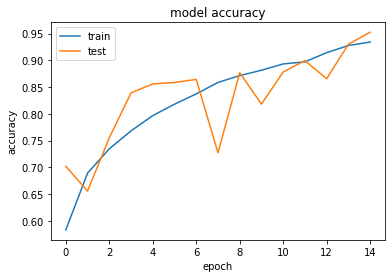

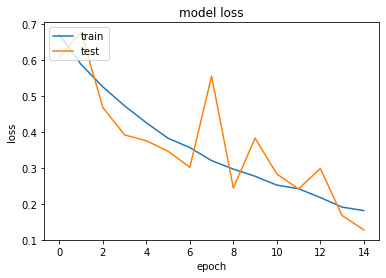

90/90 [==============================] - 2s 26ms/step - loss: 0.1274 - accuracy: 0.9524 - precision_22: 0.9222 - recall_21: 0.9504
learning rate: 0.05
Epoch 1/15
830/830 [==============================] - 119s 143ms/step - loss: 0.6388 - accuracy: 0.6300 - precision_23: 0.6326 - recall_22: 0.3492 - val_loss: 0.4786 - val_accuracy: 0.7608 - val_precision_23: 0.7198 - val_recall_22: 0.5687
Epoch 2/15
830/830 [==============================] - 117s 141ms/step - loss: 0.5169 - accuracy: 0.7473 - precision_23: 0.7286 - recall_22: 0.6647 - val_loss: 0.3490 - val_accuracy: 0.8336 - val_precision_23: 0.8295 - val_recall_22: 0.6870
Epoch 3/15
830/830 [==============================] - 115s 138ms/step - loss: 0.4246 - accuracy: 0.7962 - precision_23: 0.7758 - recall_22: 0.7450 - val_loss: 0.8433 - val_accuracy: 0.5776 - val_precision_23: 0.4644 - val_recall_22: 0.9962
Epoch 4/15
830/830 [==============================] - 122s 147ms/step - loss: 0.3484 - accuracy: 0.8384 - precision_23: 0.8072 - 

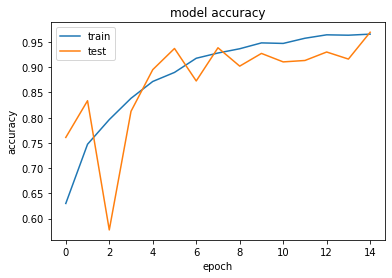

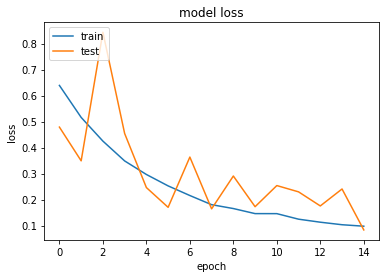

90/90 [==============================] - 2s 21ms/step - loss: 0.0834 - accuracy: 0.9692 - precision_23: 0.9255 - recall_22: 0.9962
learning rate: 0.1
Epoch 1/15
830/830 [==============================] - 113s 136ms/step - loss: 0.6596 - accuracy: 0.6068 - precision_24: 0.5996 - recall_23: 0.2797 - val_loss: 0.5468 - val_accuracy: 0.6993 - val_precision_24: 0.8730 - val_recall_23: 0.2099
Epoch 2/15
830/830 [==============================] - 113s 136ms/step - loss: 0.5635 - accuracy: 0.7028 - precision_24: 0.6713 - recall_23: 0.6160 - val_loss: 0.6009 - val_accuracy: 0.6280 - val_precision_24: 0.4961 - val_recall_23: 0.9771
Epoch 3/15
830/830 [==============================] - 113s 136ms/step - loss: 0.4506 - accuracy: 0.7799 - precision_24: 0.7442 - recall_23: 0.7499 - val_loss: 0.4019 - val_accuracy: 0.8154 - val_precision_24: 0.8155 - val_recall_23: 0.6412
Epoch 4/15
830/830 [==============================] - 113s 136ms/step - loss: 0.4343 - accuracy: 0.7965 - precision_24: 0.7634 - r

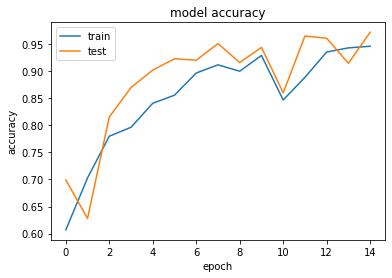

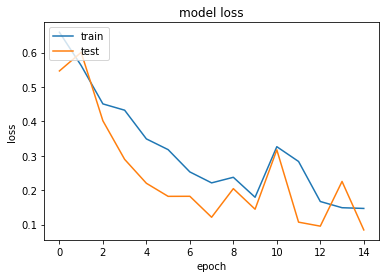

90/90 [==============================] - 2s 20ms/step - loss: 0.0847 - accuracy: 0.9720 - precision_24: 0.9321 - recall_23: 0.9962
learning rate: 0.5
Epoch 1/15
830/830 [==============================] - 117s 141ms/step - loss: 0.6891 - accuracy: 0.5593 - precision_25: 0.4557 - recall_24: 0.0859 - val_loss: 0.6570 - val_accuracy: 0.6336 - val_precision_25: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 2/15
830/830 [==============================] - 112s 135ms/step - loss: 0.6887 - accuracy: 0.5599 - precision_25: 0.4295 - recall_24: 0.0466 - val_loss: 0.7178 - val_accuracy: 0.3664 - val_precision_25: 0.3664 - val_recall_24: 1.0000
Epoch 3/15
830/830 [==============================] - 114s 137ms/step - loss: 0.6889 - accuracy: 0.5578 - precision_25: 0.4176 - recall_24: 0.0511 - val_loss: 0.6620 - val_accuracy: 0.6336 - val_precision_25: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 4/15
830/830 [==============================] - 113s 136ms/step - loss: 0.6878 - accuracy: 0.5580 - precisio

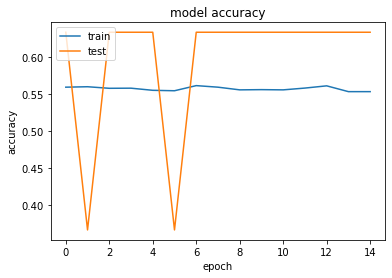

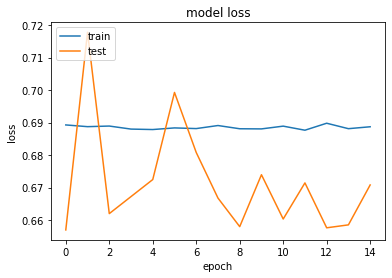

90/90 [==============================] - 2s 21ms/step - loss: 0.6708 - accuracy: 0.6336 - precision_25: 0.0000e+00 - recall_24: 0.0000e+00


In [ ]:
lr_list = [0.005, 0.01, 0.05, 0.1, 0.5]
lr_score_dict = {}
lr_score_dict['error of testing data'] = []
lr_score_dict['Accuracy'] = []
lr_score_dict['F1 score'] = []

for lr in lr_list:
    print('learning rate:', lr)
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model = basic_cnn()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    history = model.fit_generator(train_data, validation_data=test_data, epochs=EPOCH)
    plot_history_acc(history)
    plot_history_loss(history)
    
    loss, acc, precision, recall = model.evaluate(test_data)
    lr_score_dict['error of testing data'].append(loss)
    lr_score_dict['Accuracy'].append(acc)
    lr_score_dict['F1 score'].append(2*(precision*recall)/(precision+recall))
    

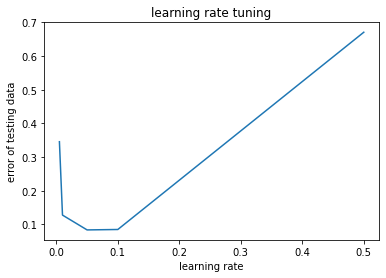

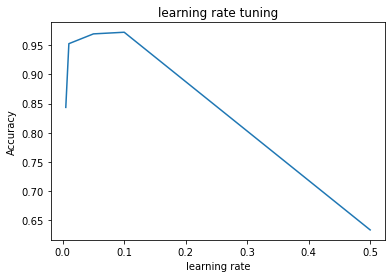

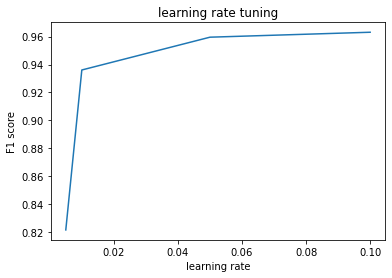

In [ ]:
for metric in lr_score_dict.keys():
    plt.plot(lr_list, lr_score_dict[metric])
    plt.xlabel('learning rate')
    plt.ylabel(metric)
    plt.title("learning rate tuning")
    plt.show()

選出 accuracy 最好的learning rate

In [ ]:
best_lr_idx = np.argmax(lr_score_dict['Accuracy'])
best_lr = lr_list[best_lr_idx]
best_lr

0.1

### momentum tuning

momentum: 0.005
Epoch 1/15
830/830 [==============================] - 115s 138ms/step - loss: 0.6552 - accuracy: 0.6113 - precision_26: 0.6072 - recall_25: 0.2925 - val_loss: 0.5552 - val_accuracy: 0.7483 - val_precision_26: 0.7092 - val_recall_25: 0.5305
Epoch 2/15
830/830 [==============================] - 114s 137ms/step - loss: 0.5710 - accuracy: 0.6949 - precision_26: 0.6700 - recall_25: 0.5833 - val_loss: 0.5921 - val_accuracy: 0.6881 - val_precision_26: 0.5429 - val_recall_25: 0.9427
Epoch 3/15
830/830 [==============================] - 114s 137ms/step - loss: 0.5252 - accuracy: 0.7336 - precision_26: 0.7066 - recall_25: 0.6591 - val_loss: 0.4271 - val_accuracy: 0.7902 - val_precision_26: 0.7121 - val_recall_25: 0.7176
Epoch 4/15
830/830 [==============================] - 115s 138ms/step - loss: 0.4301 - accuracy: 0.7977 - precision_26: 0.7640 - recall_25: 0.7715 - val_loss: 0.3079 - val_accuracy: 0.8587 - val_precision_26: 0.8676 - val_recall_25: 0.7252
Epoch 5/15
830/830 [====

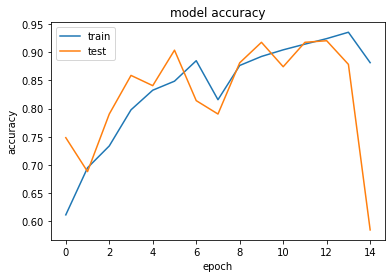

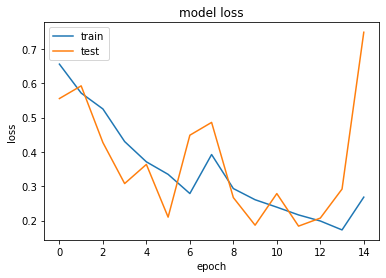

90/90 [==============================] - 2s 20ms/step - loss: 0.7461 - accuracy: 0.5846 - precision_26: 0.4687 - recall_25: 1.0000
momentum: 0.01
Epoch 1/15
830/830 [==============================] - 114s 137ms/step - loss: 0.6533 - accuracy: 0.6219 - precision_27: 0.6173 - recall_26: 0.3360 - val_loss: 0.5823 - val_accuracy: 0.6671 - val_precision_27: 1.0000 - val_recall_26: 0.0916
Epoch 2/15
830/830 [==============================] - 114s 137ms/step - loss: 0.6418 - accuracy: 0.6296 - precision_27: 0.6169 - recall_26: 0.3837 - val_loss: 0.5422 - val_accuracy: 0.7231 - val_precision_27: 0.5751 - val_recall_26: 0.9351
Epoch 3/15
830/830 [==============================] - 113s 137ms/step - loss: 0.5542 - accuracy: 0.7125 - precision_27: 0.6867 - recall_26: 0.6191 - val_loss: 0.3710 - val_accuracy: 0.8406 - val_precision_27: 0.7803 - val_recall_26: 0.7863
Epoch 4/15
830/830 [==============================] - 114s 137ms/step - loss: 0.4471 - accuracy: 0.7832 - precision_27: 0.7506 - recal

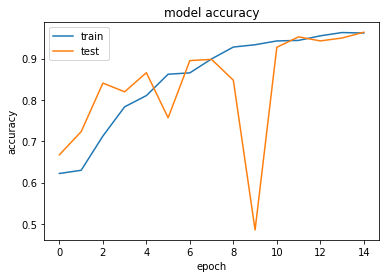

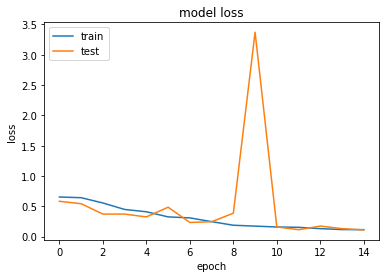

90/90 [==============================] - 2s 20ms/step - loss: 0.1100 - accuracy: 0.9636 - precision_27: 0.9403 - recall_26: 0.9618
momentum: 0.05
Epoch 1/15
830/830 [==============================] - 114s 137ms/step - loss: 0.6661 - accuracy: 0.5951 - precision_28: 0.5787 - recall_27: 0.2417 - val_loss: 0.6245 - val_accuracy: 0.6336 - val_precision_28: 0.0000e+00 - val_recall_27: 0.0000e+00
Epoch 2/15
830/830 [==============================] - 115s 138ms/step - loss: 0.6404 - accuracy: 0.6367 - precision_28: 0.6087 - recall_27: 0.4529 - val_loss: 0.6379 - val_accuracy: 0.6112 - val_precision_28: 0.4841 - val_recall_27: 0.9275
Epoch 3/15
830/830 [==============================] - 115s 139ms/step - loss: 0.5867 - accuracy: 0.6851 - precision_28: 0.6492 - recall_27: 0.5948 - val_loss: 0.5604 - val_accuracy: 0.6811 - val_precision_28: 0.5357 - val_recall_27: 0.9733
Epoch 4/15
830/830 [==============================] - 113s 136ms/step - loss: 0.5254 - accuracy: 0.7268 - precision_28: 0.6896

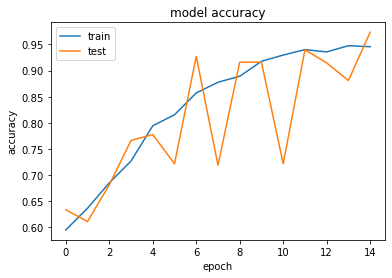

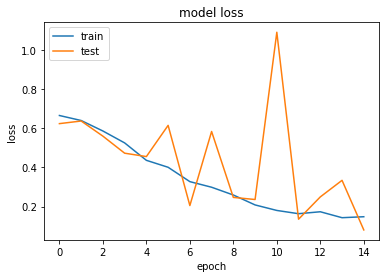

90/90 [==============================] - 2s 22ms/step - loss: 0.0802 - accuracy: 0.9734 - precision_28: 0.9324 - recall_27: 1.0000
momentum: 0.1
Epoch 1/15
830/830 [==============================] - 116s 140ms/step - loss: 0.6726 - accuracy: 0.5807 - precision_29: 0.5485 - recall_28: 0.1850 - val_loss: 0.6653 - val_accuracy: 0.6713 - val_precision_29: 0.5818 - val_recall_28: 0.3664
Epoch 2/15
830/830 [==============================] - 113s 136ms/step - loss: 0.6325 - accuracy: 0.6406 - precision_29: 0.6179 - recall_28: 0.4477 - val_loss: 0.5085 - val_accuracy: 0.7706 - val_precision_29: 0.6601 - val_recall_28: 0.7710
Epoch 3/15
830/830 [==============================] - 114s 137ms/step - loss: 0.5746 - accuracy: 0.6991 - precision_29: 0.6674 - recall_28: 0.6094 - val_loss: 0.4806 - val_accuracy: 0.7622 - val_precision_29: 0.6271 - val_recall_28: 0.8664
Epoch 4/15
830/830 [==============================] - 114s 137ms/step - loss: 0.4837 - accuracy: 0.7610 - precision_29: 0.7226 - recall

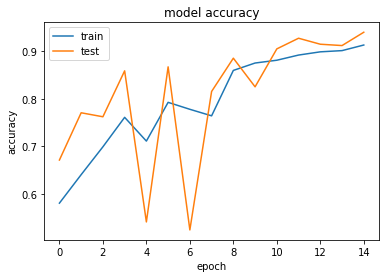

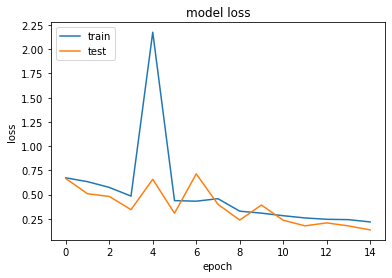

90/90 [==============================] - 2s 22ms/step - loss: 0.1351 - accuracy: 0.9399 - precision_29: 0.8869 - recall_28: 0.9580
momentum: 0.5
Epoch 1/15
830/830 [==============================] - 115s 138ms/step - loss: 0.6842 - accuracy: 0.5678 - precision_30: 0.5062 - recall_29: 0.1141 - val_loss: 0.6552 - val_accuracy: 0.6336 - val_precision_30: 0.0000e+00 - val_recall_29: 0.0000e+00
Epoch 2/15
830/830 [==============================] - 114s 137ms/step - loss: 0.6710 - accuracy: 0.5932 - precision_30: 0.5753 - recall_29: 0.2351 - val_loss: 0.5954 - val_accuracy: 0.7497 - val_precision_30: 0.6113 - val_recall_29: 0.8702
Epoch 3/15
830/830 [==============================] - 113s 137ms/step - loss: 0.6576 - accuracy: 0.6052 - precision_30: 0.5732 - recall_29: 0.3485 - val_loss: 0.6282 - val_accuracy: 0.6364 - val_precision_30: 1.0000 - val_recall_29: 0.0076
Epoch 4/15
830/830 [==============================] - 114s 138ms/step - loss: 0.6353 - accuracy: 0.6395 - precision_30: 0.6162 

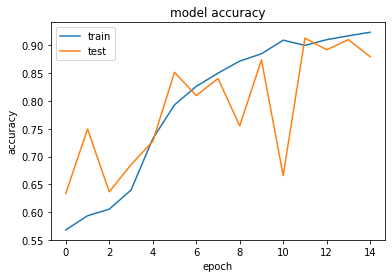

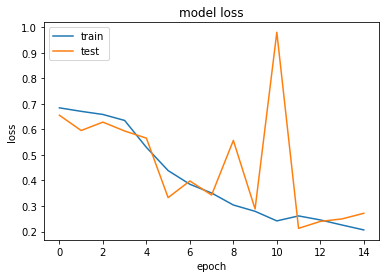

90/90 [==============================] - 3s 34ms/step - loss: 0.2716 - accuracy: 0.8797 - precision_30: 0.7529 - recall_29: 1.0000


In [ ]:
momentum_list = [0.005, 0.01, 0.05, 0.1, 0.5]
momentum_score_dict = {}
momentum_score_dict['error of testing data'] = []
momentum_score_dict['Accuracy'] = []
momentum_score_dict['F1 score'] = []

for mom in momentum_list:
    print('momentum:', mom)
    opt = tf.keras.optimizers.SGD(learning_rate=best_lr, momentum=mom)
    model = basic_cnn()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    history = model.fit_generator(train_data, validation_data=test_data, epochs=EPOCH)
    plot_history_acc(history)
    plot_history_loss(history)
    
    loss, acc, precision, recall = model.evaluate(test_data)
    momentum_score_dict['error of testing data'].append(loss)
    momentum_score_dict['Accuracy'].append(acc)
    momentum_score_dict['F1 score'].append(2*(precision*recall)/(precision+recall))
    

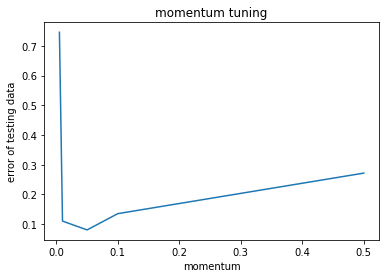

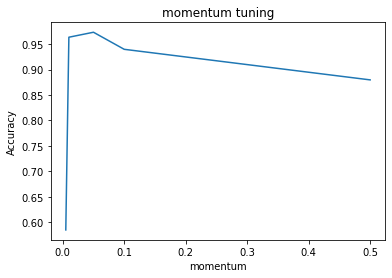

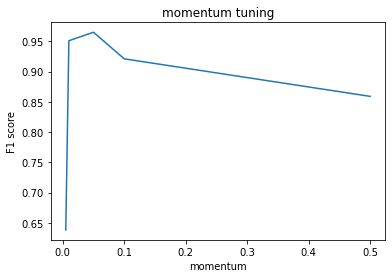

In [ ]:
for metric in momentum_score_dict.keys():
    plt.plot(momentum_list, momentum_score_dict[metric])
    plt.xlabel('momentum')
    plt.ylabel(metric)
    plt.title("momentum tuning")
    plt.show()

選出 accuracy 最好的 momentum

In [ ]:
best_momentum_idx = np.argmax(momentum_score_dict['Accuracy'])
best_momentum = momentum_list[best_momentum_idx]
best_momentum

0.05

### Number of hidden layer tuning

In [ ]:
def tune_layer_cnn(hidden_layer_number, dropout_rate):
    model = tf.keras.models.Sequential()
    # Adding the layers
    input_shape_ = (64,64) + (COLOR_SPECTRUM_, )
    model.add(tf.keras.layers.Conv2D(BATCH_SIZE_, (3,3), input_shape=input_shape_, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Add a second layer
    model.add(tf.keras.layers.Conv2D(BATCH_SIZE_, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Flattening
    model.add(tf.keras.layers.Flatten())
    
    for i in np.arange(hidden_layer_number):
        model.add(tf.keras.layers.Dense(units = 64, activation='relu'))
        model.add(tf.keras.layers.Dropout(rate=dropout_rate))

    model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
    
    return model

Number of layer: 1
Epoch 1/15
830/830 [==============================] - 114s 137ms/step - loss: 0.6720 - accuracy: 0.5816 - precision_31: 0.5623 - recall_30: 0.1569 - val_loss: 0.5427 - val_accuracy: 0.7273 - val_precision_31: 0.5898 - val_recall_30: 0.8397
Epoch 2/15
830/830 [==============================] - 114s 137ms/step - loss: 0.5488 - accuracy: 0.7140 - precision_31: 0.6848 - recall_30: 0.6303 - val_loss: 0.4834 - val_accuracy: 0.7608 - val_precision_31: 0.6107 - val_recall_30: 0.9580
Epoch 3/15
830/830 [==============================] - 113s 136ms/step - loss: 0.4546 - accuracy: 0.7800 - precision_31: 0.7398 - recall_30: 0.7597 - val_loss: 0.3120 - val_accuracy: 0.8573 - val_precision_31: 0.7759 - val_recall_30: 0.8588
Epoch 4/15
830/830 [==============================] - 113s 136ms/step - loss: 0.3794 - accuracy: 0.8229 - precision_31: 0.7828 - recall_30: 0.8184 - val_loss: 0.4407 - val_accuracy: 0.7622 - val_precision_31: 0.6070 - val_recall_30: 0.9962
Epoch 5/15
830/830 [=

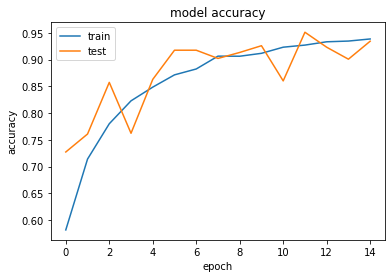

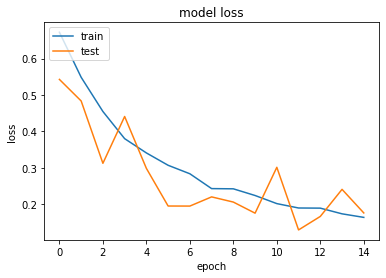

90/90 [==============================] - 2s 22ms/step - loss: 0.1756 - accuracy: 0.9343 - precision_31: 0.8502 - recall_30: 0.9962
Number of layer: 2
Epoch 1/15
830/830 [==============================] - 123s 148ms/step - loss: 0.6697 - accuracy: 0.5857 - precision_32: 0.5608 - recall_31: 0.2038 - val_loss: 0.6561 - val_accuracy: 0.6336 - val_precision_32: 0.0000e+00 - val_recall_31: 0.0000e+00
Epoch 2/15
830/830 [==============================] - 125s 150ms/step - loss: 0.6490 - accuracy: 0.6184 - precision_32: 0.5840 - recall_31: 0.4160 - val_loss: 0.5388 - val_accuracy: 0.7329 - val_precision_32: 0.6066 - val_recall_31: 0.7710
Epoch 3/15
830/830 [==============================] - 123s 148ms/step - loss: 0.6431 - accuracy: 0.6359 - precision_32: 0.6106 - recall_31: 0.4417 - val_loss: 0.5796 - val_accuracy: 0.7343 - val_precision_32: 0.6091 - val_recall_31: 0.7672
Epoch 4/15
830/830 [==============================] - 122s 147ms/step - loss: 0.5778 - accuracy: 0.6947 - precision_32: 0.

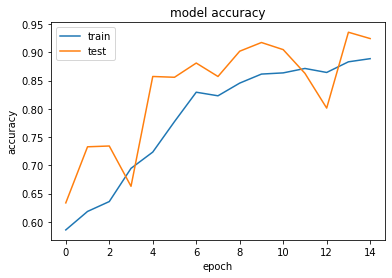

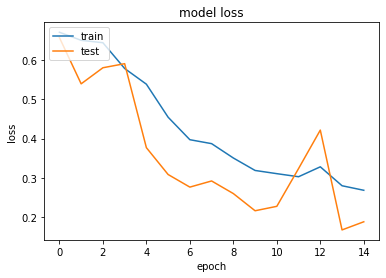

90/90 [==============================] - 2s 22ms/step - loss: 0.1890 - accuracy: 0.9245 - precision_32: 0.8514 - recall_31: 0.9618
Number of layer: 3
Epoch 1/15
830/830 [==============================] - 133s 160ms/step - loss: 0.6763 - accuracy: 0.5779 - precision_33: 0.5389 - recall_32: 0.1809 - val_loss: 0.6728 - val_accuracy: 0.5720 - val_precision_33: 0.4547 - val_recall_32: 0.8435
Epoch 2/15
830/830 [==============================] - 134s 161ms/step - loss: 0.6619 - accuracy: 0.5904 - precision_33: 0.5427 - recall_32: 0.3489 - val_loss: 0.5786 - val_accuracy: 0.7483 - val_precision_33: 0.6424 - val_recall_32: 0.7061
Epoch 3/15
830/830 [==============================] - 131s 158ms/step - loss: 0.6238 - accuracy: 0.6593 - precision_33: 0.6239 - recall_32: 0.5384 - val_loss: 0.7483 - val_accuracy: 0.5958 - val_precision_33: 0.4736 - val_recall_32: 0.9237
Epoch 4/15
830/830 [==============================] - 132s 159ms/step - loss: 0.5449 - accuracy: 0.7212 - precision_33: 0.6786 - r

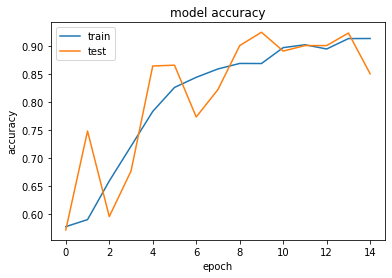

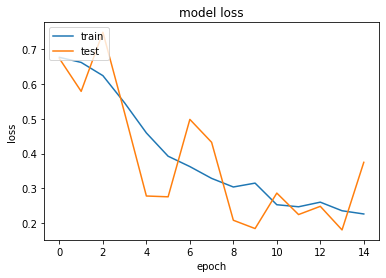

90/90 [==============================] - 2s 22ms/step - loss: 0.3701 - accuracy: 0.8503 - precision_33: 0.7100 - recall_32: 1.0000
Number of layer: 4
Epoch 1/15
830/830 [==============================] - 142s 171ms/step - loss: 0.6778 - accuracy: 0.5718 - precision_34: 0.5325 - recall_33: 0.0998 - val_loss: 0.5897 - val_accuracy: 0.6657 - val_precision_34: 1.0000 - val_recall_33: 0.0878
Epoch 2/15
830/830 [==============================] - 149s 180ms/step - loss: 0.6529 - accuracy: 0.6128 - precision_34: 0.5926 - recall_33: 0.3416 - val_loss: 0.5155 - val_accuracy: 0.7287 - val_precision_34: 0.6104 - val_recall_33: 0.7176
Epoch 3/15
830/830 [==============================] - 144s 174ms/step - loss: 0.5776 - accuracy: 0.6986 - precision_34: 0.6596 - recall_33: 0.6296 - val_loss: 1.1443 - val_accuracy: 0.4252 - val_precision_34: 0.3893 - val_recall_33: 1.0000
Epoch 4/15
830/830 [==============================] - 141s 170ms/step - loss: 0.5546 - accuracy: 0.7187 - precision_34: 0.6829 - r

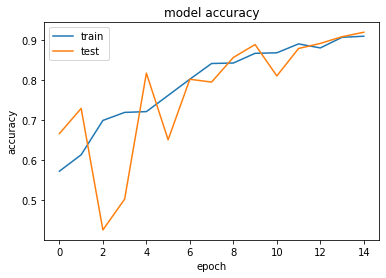

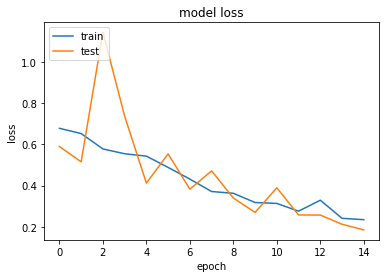

90/90 [==============================] - 2s 23ms/step - loss: 0.1931 - accuracy: 0.9189 - precision_34: 0.8188 - recall_33: 1.0000
Number of layer: 5
Epoch 1/15
830/830 [==============================] - 150s 181ms/step - loss: 0.6868 - accuracy: 0.5646 - precision_35: 0.4488 - recall_34: 0.0198 - val_loss: 0.6614 - val_accuracy: 0.6336 - val_precision_35: 0.0000e+00 - val_recall_34: 0.0000e+00
Epoch 2/15
830/830 [==============================] - 150s 181ms/step - loss: 0.6854 - accuracy: 0.5651 - precision_35: 0.4107 - recall_34: 0.0080 - val_loss: 0.6596 - val_accuracy: 0.6336 - val_precision_35: 0.0000e+00 - val_recall_34: 0.0000e+00
Epoch 3/15
830/830 [==============================] - 152s 183ms/step - loss: 0.6730 - accuracy: 0.5877 - precision_35: 0.5871 - recall_34: 0.1642 - val_loss: 0.6728 - val_accuracy: 0.6336 - val_precision_35: 0.0000e+00 - val_recall_34: 0.0000e+00
Epoch 4/15
830/830 [==============================] - 151s 182ms/step - loss: 0.6527 - accuracy: 0.6130 - 

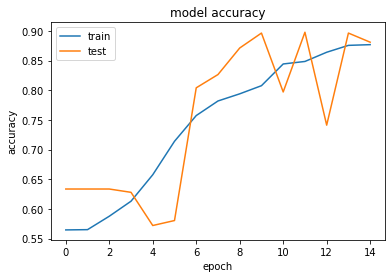

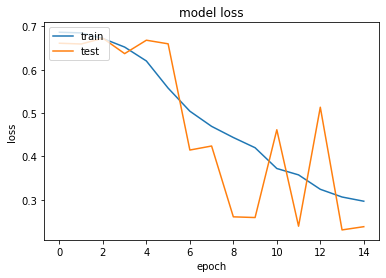

90/90 [==============================] - 2s 24ms/step - loss: 0.2382 - accuracy: 0.8811 - precision_35: 0.7580 - recall_34: 0.9924


In [ ]:
layer_list = [1, 2, 3, 4, 5]
layer_score_dict = {}
layer_score_dict['error of testing data'] = []
layer_score_dict['Accuracy'] = []
layer_score_dict['F1 score'] = []

for hidden_layer_number in layer_list:
    print('Number of layer:', hidden_layer_number)
    opt = tf.keras.optimizers.SGD(learning_rate=best_lr, momentum=best_momentum)
    model = tune_layer_cnn(hidden_layer_number, 0.2)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    history = model.fit_generator(train_data, validation_data=test_data, epochs=EPOCH)
    plot_history_acc(history)
    plot_history_loss(history)
    
    loss, acc, precision, recall = model.evaluate(test_data)
    layer_score_dict['error of testing data'].append(loss)
    layer_score_dict['Accuracy'].append(acc)
    layer_score_dict['F1 score'].append(2*(precision*recall)/(precision+recall))
    

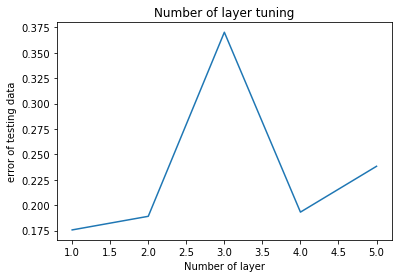

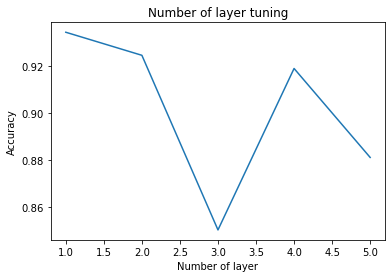

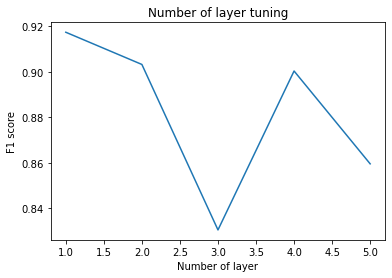

In [ ]:
for metric in layer_score_dict.keys():
    plt.plot(layer_list, layer_score_dict[metric])
    plt.xlabel('Number of layer')
    plt.ylabel(metric)
    plt.title("Number of layer tuning")
    plt.show()

選出 Accuracy 最好的 hidden layer 數量

In [ ]:
best_layer_idx = np.argmax(layer_score_dict['Accuracy'])
best_layer = layer_list[best_layer_idx]
best_layer

1

### dropout rate tuning

Dropout rate: 0.1
Epoch 1/15
830/830 [==============================] - 111s 134ms/step - loss: 0.6622 - accuracy: 0.6052 - precision_36: 0.5917 - recall_35: 0.2873 - val_loss: 0.6323 - val_accuracy: 0.6084 - val_precision_36: 0.4830 - val_recall_35: 0.9771
Epoch 2/15
830/830 [==============================] - 111s 134ms/step - loss: 0.5319 - accuracy: 0.7270 - precision_36: 0.6943 - recall_35: 0.6612 - val_loss: 0.3997 - val_accuracy: 0.8168 - val_precision_36: 0.6775 - val_recall_35: 0.9542
Epoch 3/15
830/830 [==============================] - 111s 134ms/step - loss: 0.4201 - accuracy: 0.7962 - precision_36: 0.7612 - recall_35: 0.7718 - val_loss: 0.3964 - val_accuracy: 0.8154 - val_precision_36: 0.6702 - val_recall_35: 0.9771
Epoch 4/15
830/830 [==============================] - 2831s 3s/step - loss: 0.3468 - accuracy: 0.8426 - precision_36: 0.8086 - recall_35: 0.8344 - val_loss: 0.4164 - val_accuracy: 0.8028 - val_precision_36: 0.6501 - val_recall_35: 1.0000
Epoch 5/15
830/830 [====

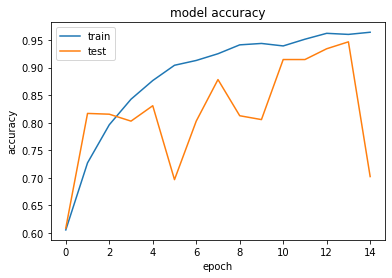

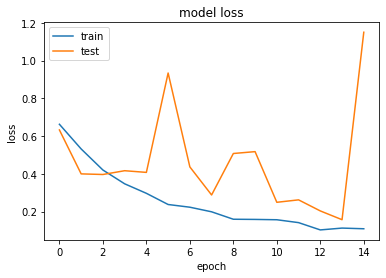

90/90 [==============================] - 3s 30ms/step - loss: 1.1620 - accuracy: 0.7021 - precision_36: 0.5516 - recall_35: 1.0000
Dropout rate: 0.2
Epoch 1/15
830/830 [==============================] - 143s 173ms/step - loss: 0.6625 - accuracy: 0.5948 - precision_37: 0.5860 - recall_36: 0.2216 - val_loss: 0.5675 - val_accuracy: 0.6517 - val_precision_37: 1.0000 - val_recall_36: 0.0496
Epoch 2/15
830/830 [==============================] - 126s 152ms/step - loss: 0.6216 - accuracy: 0.6514 - precision_37: 0.6199 - recall_36: 0.5061 - val_loss: 0.4700 - val_accuracy: 0.7385 - val_precision_37: 0.8049 - val_recall_36: 0.3779
Epoch 3/15
830/830 [==============================] - 144s 173ms/step - loss: 0.5145 - accuracy: 0.7410 - precision_37: 0.7062 - recall_36: 0.6890 - val_loss: 0.4596 - val_accuracy: 0.7720 - val_precision_37: 0.6187 - val_recall_36: 0.9847
Epoch 4/15
830/830 [==============================] - 153s 184ms/step - loss: 0.4378 - accuracy: 0.7862 - precision_37: 0.7496 - re

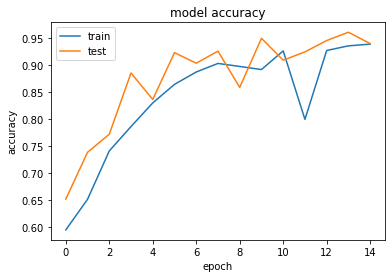

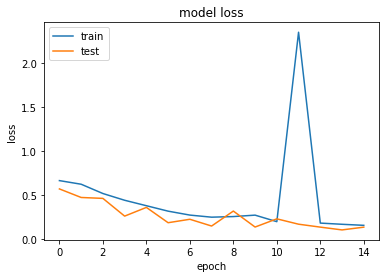

90/90 [==============================] - 2s 27ms/step - loss: 0.1321 - accuracy: 0.9399 - precision_37: 0.8662 - recall_36: 0.9885
Dropout rate: 0.3
Epoch 1/15
830/830 [==============================] - 112s 135ms/step - loss: 0.6772 - accuracy: 0.5779 - precision_38: 0.5446 - recall_37: 0.1593 - val_loss: 0.6905 - val_accuracy: 0.4811 - val_precision_38: 0.4128 - val_recall_37: 0.9847
Epoch 2/15
830/830 [==============================] - 1980s 2s/step - loss: 0.6132 - accuracy: 0.6573 - precision_38: 0.6396 - recall_37: 0.4797 - val_loss: 0.5042 - val_accuracy: 0.7133 - val_precision_38: 0.8000 - val_recall_37: 0.2901
Epoch 3/15
830/830 [==============================] - 2799s 3s/step - loss: 0.5075 - accuracy: 0.7464 - precision_38: 0.7100 - recall_37: 0.7016 - val_loss: 0.3874 - val_accuracy: 0.8280 - val_precision_38: 0.6991 - val_recall_37: 0.9313
Epoch 4/15
830/830 [==============================] - 126s 152ms/step - loss: 0.6069 - accuracy: 0.6522 - precision_38: 0.6262 - recall

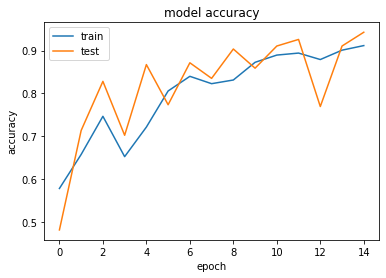

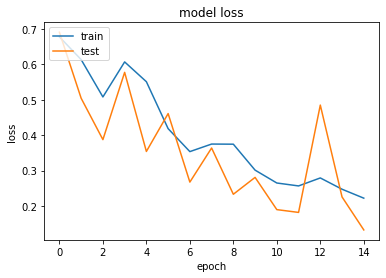

90/90 [==============================] - 3s 29ms/step - loss: 0.1326 - accuracy: 0.9427 - precision_38: 0.8721 - recall_37: 0.9885
Dropout rate: 0.4
Epoch 1/15
830/830 [==============================] - 113s 136ms/step - loss: 0.6694 - accuracy: 0.5916 - precision_39: 0.5815 - recall_38: 0.2059 - val_loss: 0.6057 - val_accuracy: 0.6867 - val_precision_39: 0.5401 - val_recall_38: 0.9771
Epoch 2/15
830/830 [==============================] - 119s 143ms/step - loss: 0.5573 - accuracy: 0.7149 - precision_39: 0.6934 - recall_38: 0.6136 - val_loss: 1.0051 - val_accuracy: 0.4839 - val_precision_39: 0.4149 - val_recall_38: 0.9962
Epoch 3/15
830/830 [==============================] - 128s 154ms/step - loss: 0.4975 - accuracy: 0.7518 - precision_39: 0.7200 - recall_38: 0.6995 - val_loss: 0.3383 - val_accuracy: 0.8448 - val_precision_39: 0.8032 - val_recall_38: 0.7634
Epoch 4/15
830/830 [==============================] - 140s 169ms/step - loss: 0.4548 - accuracy: 0.7742 - precision_39: 0.7303 - re

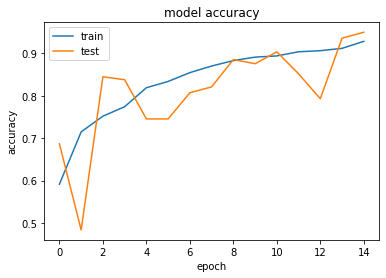

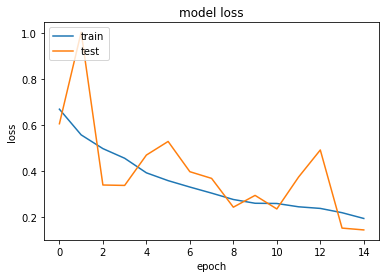

90/90 [==============================] - 3s 31ms/step - loss: 0.1423 - accuracy: 0.9497 - precision_39: 0.8844 - recall_38: 0.9924
Dropout rate: 0.5
Epoch 1/15
830/830 [==============================] - 141s 170ms/step - loss: 0.6773 - accuracy: 0.5741 - precision_40: 0.5306 - recall_39: 0.1506 - val_loss: 0.6426 - val_accuracy: 0.6336 - val_precision_40: 0.0000e+00 - val_recall_39: 0.0000e+00
Epoch 2/15
830/830 [==============================] - 147s 177ms/step - loss: 0.6620 - accuracy: 0.6020 - precision_40: 0.5768 - recall_39: 0.3068 - val_loss: 0.8173 - val_accuracy: 0.3664 - val_precision_40: 0.3664 - val_recall_39: 1.0000
Epoch 3/15
830/830 [==============================] - 147s 177ms/step - loss: 0.6546 - accuracy: 0.6082 - precision_40: 0.5872 - recall_39: 0.3231 - val_loss: 0.7393 - val_accuracy: 0.4490 - val_precision_40: 0.3991 - val_recall_39: 0.9962
Epoch 4/15
830/830 [==============================] - 157s 189ms/step - loss: 0.6705 - accuracy: 0.5786 - precision_40: 0.5

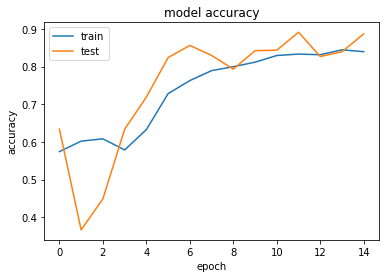

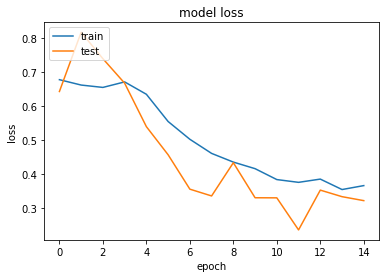

90/90 [==============================] - 2s 25ms/step - loss: 0.3208 - accuracy: 0.8867 - precision_40: 0.8131 - recall_39: 0.8969


In [ ]:
dropout_rate_list = [.1, .2, .3, .4, .5]
dropout_rate_score_dict = {}
dropout_rate_score_dict['error of testing data'] = []
dropout_rate_score_dict['Accuracy'] = []
dropout_rate_score_dict['F1 score'] = []

for dropout_rate in dropout_rate_list:
    print('Dropout rate:', dropout_rate)
    opt = tf.keras.optimizers.SGD(learning_rate=best_lr, momentum=best_momentum)
    model = tune_layer_cnn(best_layer, dropout_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    history = model.fit_generator(train_data, validation_data=test_data, epochs=EPOCH)
    plot_history_acc(history)
    plot_history_loss(history)
    
    loss, acc, precision, recall = model.evaluate(test_data)
    dropout_rate_score_dict['error of testing data'].append(loss)
    dropout_rate_score_dict['Accuracy'].append(acc)
    dropout_rate_score_dict['F1 score'].append(2*(precision*recall)/(precision+recall))

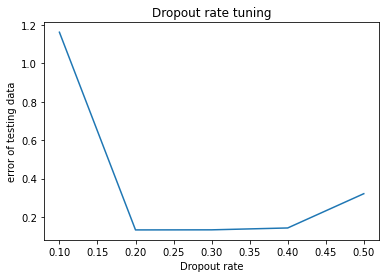

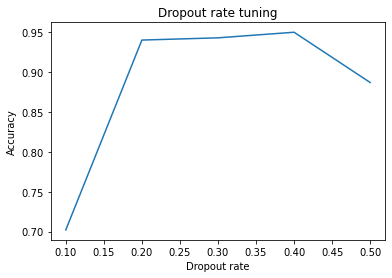

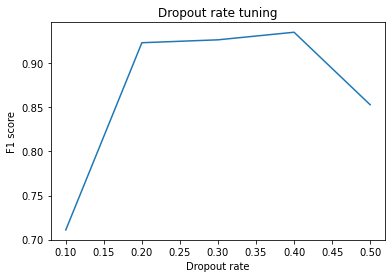

In [ ]:
for metric in dropout_rate_score_dict.keys():
    plt.plot(dropout_rate_list, dropout_rate_score_dict[metric])
    plt.xlabel('Dropout rate')
    plt.ylabel(metric)
    plt.title("Dropout rate tuning")
    plt.show()

選出 accuracy 最高的 dropout rate

In [ ]:
best_dropout_rate_idx = np.argmax(dropout_rate_score_dict['Accuracy'])
best_dropout_rate = dropout_rate_list[best_dropout_rate_idx]
best_dropout_rate

0.4

---
# 4. (15%) Time-Series Prediction

## (a) (10%) Prepare and transform the data to appropriate format (eg. use Data Generator in https://www.datacamp.com/community/tutorials/lstm-python-stock-market). Build LSTM model and show the prediction results via Time-series Nested Cross Validation.

（因為 tensorflow 版本問題，這一題換到 colab 上 run，所以導致前面的 cell 只有結果）

In [2]:
import datetime as dt
import urllib.request, json
from sklearn.preprocessing import MinMaxScaler
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 109.3 MB 44 kB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 3.1 MB 58.9 MB/s 
     |████████████████████████████████| 488 kB 33.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you

### Load data
使用 1988/06/26 至 2021/12/5 日的 Brent oil price data。
（因為題目要求要用 weekly data，為增加資料筆數，所以從 1980 年代的資料開始）

In [3]:
oil_df = pd.read_excel('Brent Oil Futures Historical Data_1980.xlsx')

In [4]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1746 non-null   datetime64[ns]
 1   Price     1746 non-null   float64       
 2   Open      1746 non-null   float64       
 3   High      1746 non-null   float64       
 4   Low       1746 non-null   float64       
 5   Vol.      1746 non-null   object        
 6   Change %  1746 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 95.6+ KB


### sort by datetime

In [5]:
oil_df.sort_values('Date', inplace=True)
oil_df

,Date,Price,Open,High,Low,Vol.,Change %
1745,1988-06-26,14.60,15.10,15.47,14.60,0.68K,-0.0671
1744,1988-07-03,15.05,14.50,15.45,14.30,1.50K,0.0308
1743,1988-07-10,14.18,14.70,15.12,13.79,1.81K,-0.0578
1742,1988-07-17,15.71,14.25,15.71,14.20,1.69K,0.1079
1741,1988-07-24,15.70,15.70,15.90,15.22,2.16K,-0.0006
...,...,...,...,...,...,...,...
4,2021-11-07,82.17,82.58,85.50,81.26,1.61M,-0.0069
3,2021-11-14,78.89,81.92,83.14,78.05,1.81M,-0.0399
2,2021-11-21,72.72,78.58,83.00,72.14,1.20M,-0.0782
1,2021-11-28,69.88,73.88,77.02,65.72,1.43M,-0.0391


In [6]:
oil_df_shape = oil_df.shape[0]
oil_df_shape

1746

### Data visualization

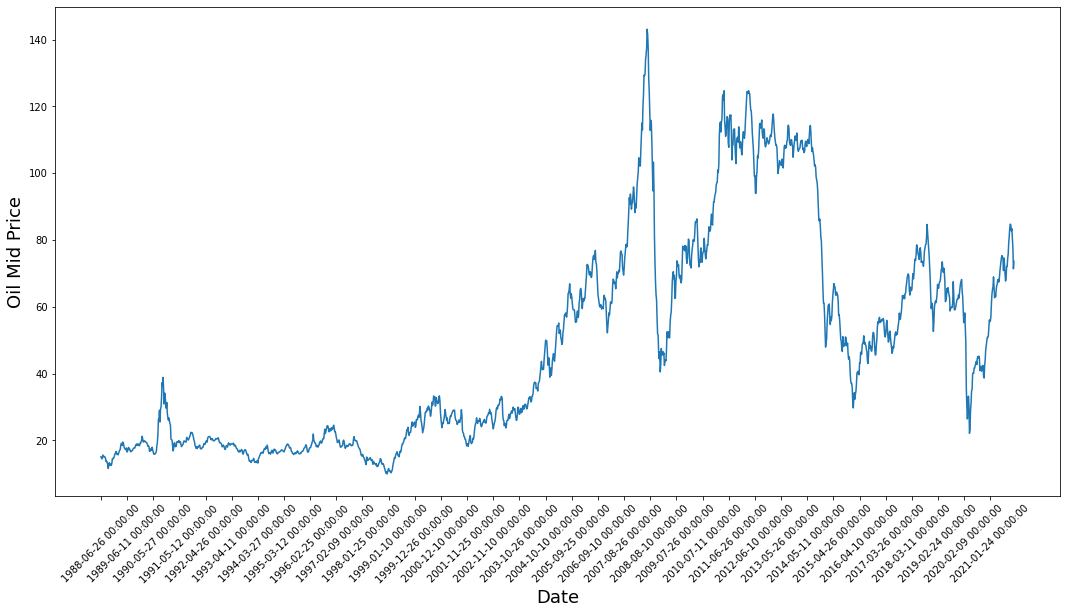

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(oil_df.shape[0]),(oil_df['Low']+oil_df['High'])/2.0)
plt.xticks(range(0,oil_df.shape[0],50),oil_df['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Oil Mid Price',fontsize=18)
plt.show()

### 建立 Mid Price

In [8]:
high_prices = oil_df['High'].to_numpy()
low_prices = oil_df['Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

### Split data into training and testing

In [10]:
train_data_number = 1200
train_data = mid_prices[:train_data_number]
test_data = mid_prices[train_data_number:]

### Normalized the data
MinMaxScalar scales all the data to be in the region of 0 and 1

In [11]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [12]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 100
for di in range(0,1100,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [39]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

ValueError: ignored

### exponential moving average smoothing
So the data will have a smoother curve than the original ragged data

In [40]:
EMA = 0.0
gamma = 0.1
for ti in range(train_data_number):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

### Data Generator

In [41]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))

In [42]:
dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.00358921 0.7404617  0.45208693 0.23702556 0.658996  ]

	Output: [0.01787116 0.73389655 0.43112525 0.2629075  0.63231504]


Unrolled index 1
	Inputs:  [0.00988382 0.73389655 0.4447762  0.2413997  0.6460912 ]

	Output: [0.05223413 0.7212925  0.4447762  0.24750695 0.5887513 ]


Unrolled index 2
	Inputs:  [0.01787116 0.7276808  0.4377473  0.24750695 0.63231504]

	Output: [0.03946134 0.7086334  0.42192584 0.24750695 0.61783904]


Unrolled index 3
	Inputs:  [0.02766842 0.7212925  0.43112525 0.25458458 0.61783904]

	Output: [0.06584406 0.7086334  0.42248613 0.2720921  0.5640071 ]


Unrolled index 4
	Inputs:  [0.03946134 0.71585715 0.42550537 0.2629075  0.6028599 ]

	Output: [0.03946134 0.7033665  0.42238852 0.28182244 0.5640071 ]


### Define hyperparameters

In [49]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 10 # Number of time steps you look into the future.
batch_size = 100 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.compat.v1.reset_default_graph() # This is important in case you run this multiple times

### Define input and output

In [51]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [52]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
   for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

### Calculating LSTM output and Feeding it to the regression layer to get final prediction

In [53]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
    c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

### Loss Calculation and Optimizer

In [54]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
    for ui in range(num_unrollings):
        loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


### Prediction Related Calculations

In [55]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
    sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
    sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


### Running the LSTM

In [58]:
epochs = 15
valid_summary = 1 # Interval you make test predictions

n_predict_once = 10 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(train_data_number,(oil_df_shape-10),10).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

Initialized
Average loss at step 1: 0.897823
	Test MSE: 0.07028
	Finished Predictions
Average loss at step 2: 0.214419
	Test MSE: 0.05080
	Finished Predictions
Average loss at step 3: 0.133451
	Test MSE: 0.05757
	Finished Predictions
Average loss at step 4: 0.100835
	Test MSE: 0.04233
	Finished Predictions
Average loss at step 5: 0.091349
	Test MSE: 0.04711
	Finished Predictions
Average loss at step 6: 0.078656
	Test MSE: 0.04107
	Finished Predictions
Average loss at step 7: 0.079452
	Test MSE: 0.03926
	Finished Predictions
Average loss at step 8: 0.071042
	Test MSE: 0.03597
	Finished Predictions
Average loss at step 9: 0.065197
	Test MSE: 0.03404
	Finished Predictions
Average loss at step 10: 0.062072
	Test MSE: 0.02949
	Finished Predictions
Average loss at step 11: 0.057150
	Test MSE: 0.02649
	Finished Predictions
Average loss at step 12: 0.051910
	Test MSE: 0.02406
	Finished Predictions
Average loss at step 13: 0.048764
	Test MSE: 0.02225
	Finished Predictions
Average loss at step 1

## (b) (5%) Visualize the time-rolling prediction as above diagram.

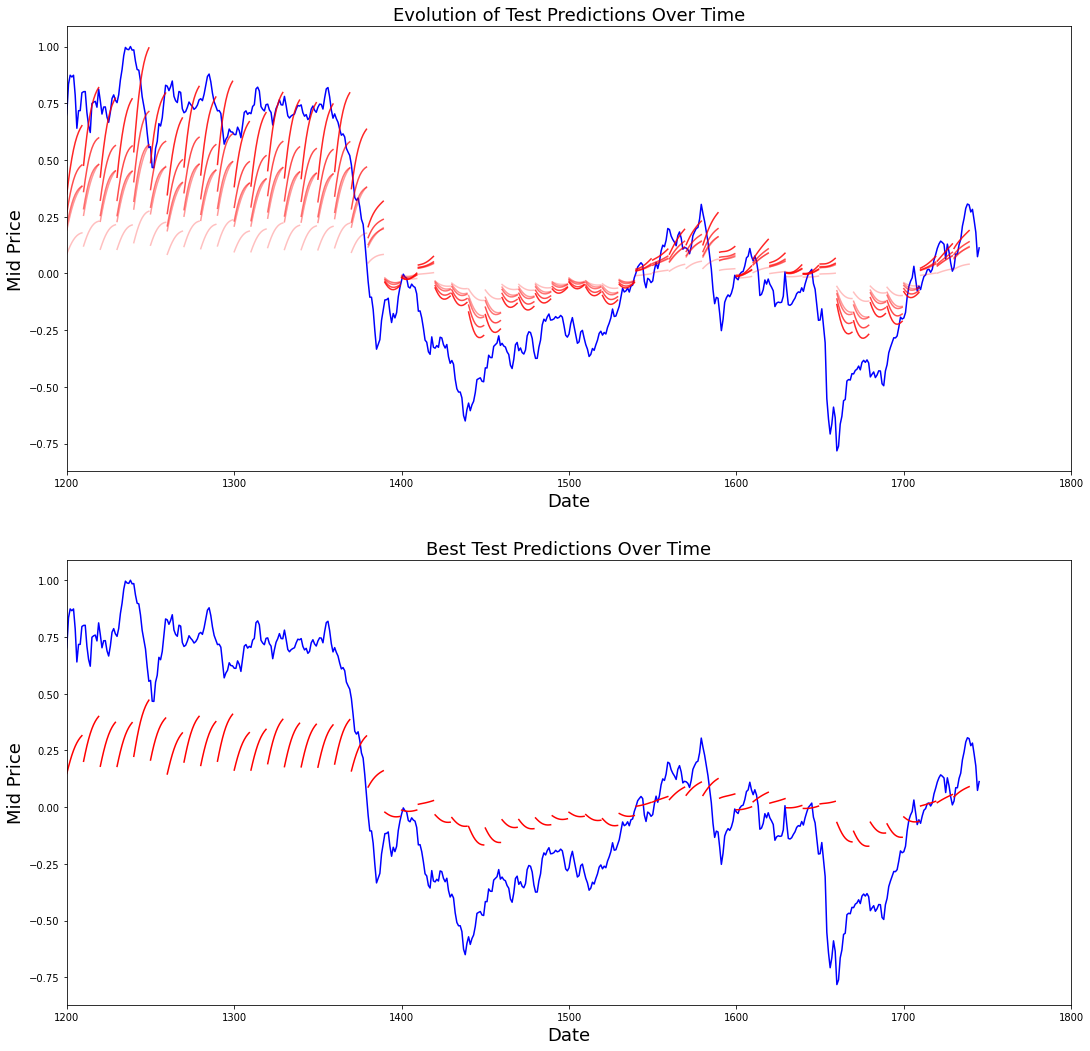

In [60]:
best_prediction_epoch = 1 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(oil_df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(1200,1800)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(oil_df.shape[0]),all_mid_data,color='b')

for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(1200,1800)
plt.show()